In [1]:
#This are the most common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [51]:
df = pd.read_csv('hmofaltasadministrativas.csv', encoding="latin1")

In [3]:
df = df.applymap(lambda s:s.upper() if type(s) == str else s)

In [4]:

df.head()

,fecha_presentacion,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,colonia_detenido
0,01/01/2015 00:39,COMANDANCIA NORTE,ALVARO OBREGON (N),CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1990,1.75,60.0,M,SAHUARO AMPLIACION
1,01/01/2015 00:39,COMANDANCIA SUR,PALO VERDE INDEUR,CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1984,1.72,85.0,M,PALO VERDE INDEUR
2,01/01/2015 01:43,COMANDANCIA NORTE,CARMEN SERDAN (N),DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRI...,1980,1.65,65.0,M,FLOTANTE
3,01/01/2015 01:59,COMANDANCIA SUR,REAL DEL CARMEN,CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1979,1.69,68.0,M,REAL DEL CARMEN
4,01/01/2015 02:00,COMANDANCIA CENTRO,FUERA DEL MUNICIPIO,INGERIR BEBIDAS ALCOHOLICAS A BORDO DE UN VEHI...,1987,1.74,70.0,M,FUERA DEL MUNICIPIO


In [5]:
df.describe()

,nacimiento,estatura,peso
count,122192.000000,122156.000000,122155.000000
mean,1984.647023,1.701958,70.110581
std,10.548520,0.081868,11.264983
min,1919.000000,0.560000,30.000000
25%,1978.000000,1.650000,63.000000
50%,1987.000000,1.700000,70.000000
75%,1993.000000,1.750000,75.000000
max,2017.000000,2.150000,245.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122192 entries, 0 to 122191
Data columns (total 9 columns):
fecha_presentacion    122192 non-null object
zona                  122192 non-null object
colonia_delito        122192 non-null object
motivo_remision       122192 non-null object
nacimiento            122192 non-null int64
estatura              122156 non-null float64
peso                  122155 non-null float64
sexo                  122192 non-null object
colonia_detenido      122192 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 8.4+ MB


In [7]:
len(df['colonia_delito'].unique())

398

In [8]:
dfcentro = df[(df['colonia_delito'].str.contains(r'CENTRO') == True)]
dfcentro.head()

,fecha_presentacion,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,colonia_detenido
23,01/01/2015 07:13,COMANDANCIA CENTRO,CENTRO (N),CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1989,1.73,100.0,M,BUGAMBILIAS
30,01/01/2015 10:45,COMANDANCIA CENTRO,CENTRO (N),PERNOCTAR EN LA VIA PUBLICA A CONSECUENCIA DE ...,1981,1.65,60.0,M,FLOTANTE
39,01/01/2015 14:34,COMANDANCIA CENTRO,CENTRO (N),CONDUCIR EDO.EBRIEDAD INFLUJO DROGAS O SUSTANC...,1975,1.72,75.0,M,OLIVARES (OTE)
52,01/01/2015 17:56,COMANDANCIA CENTRO,CENTRO (N),PROVOCAR O PARTICIPAR EN RIÑAS EN LA VIA PUBLICA,1973,1.75,90.0,M,RANCHITO
74,02/01/2015 05:19,COMANDANCIA CENTRO,CENTRO (N),CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1991,1.77,70.0,M,VILLA DE SERIS


In [9]:
len(df['colonia_detenido'].unique())

418

In [10]:
colonias_afectadas = df['colonia_delito'].value_counts()[0:15]
colonias_afectadas
#sns.countplot(colonias_afectadas)

CENTRO (N)                  9630
PUEBLITOS                   4642
SOLIDARIDAD I               3910
LA CHOYA FRACC              3006
INSURGENTES                 2648
MIGUEL HIDALGO (N)          2380
LOPEZ PORTILLO              2166
VILLA DEL REAL FRACC.       2165
REAL DEL CARMEN             2120
SAHUARO AMPLIACION          2106
VILLA VERDE                 2095
CHOYAL                      1908
SAN BENITO (CUADRO ALFA)    1894
NUEVO HERMOSILLO            1837
SAHUARO FINAL               1718
Name: colonia_delito, dtype: int64

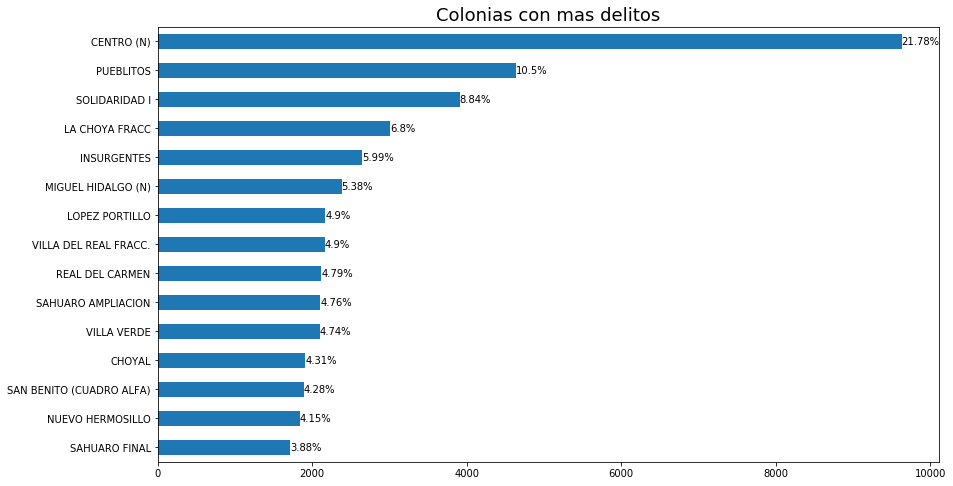

In [11]:
colonias_afectadas_plt = colonias_afectadas.plot(kind='barh',figsize = (14,8))
colonias_afectadas_plt.set_alpha(0.8)
colonias_afectadas_plt.set_title("Colonias con mas delitos", fontsize=18)


# create a list to collect the data
totals = []

# find the values and append to list
for i in colonias_afectadas_plt.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in colonias_afectadas_plt.patches:
    # get_width pulls left or right; get_y pushes up or down
    colonias_afectadas_plt.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='black')

#Invert the direction of the plot
colonias_afectadas_plt.invert_yaxis()

In [12]:
len(df['motivo_remision'].unique())

68

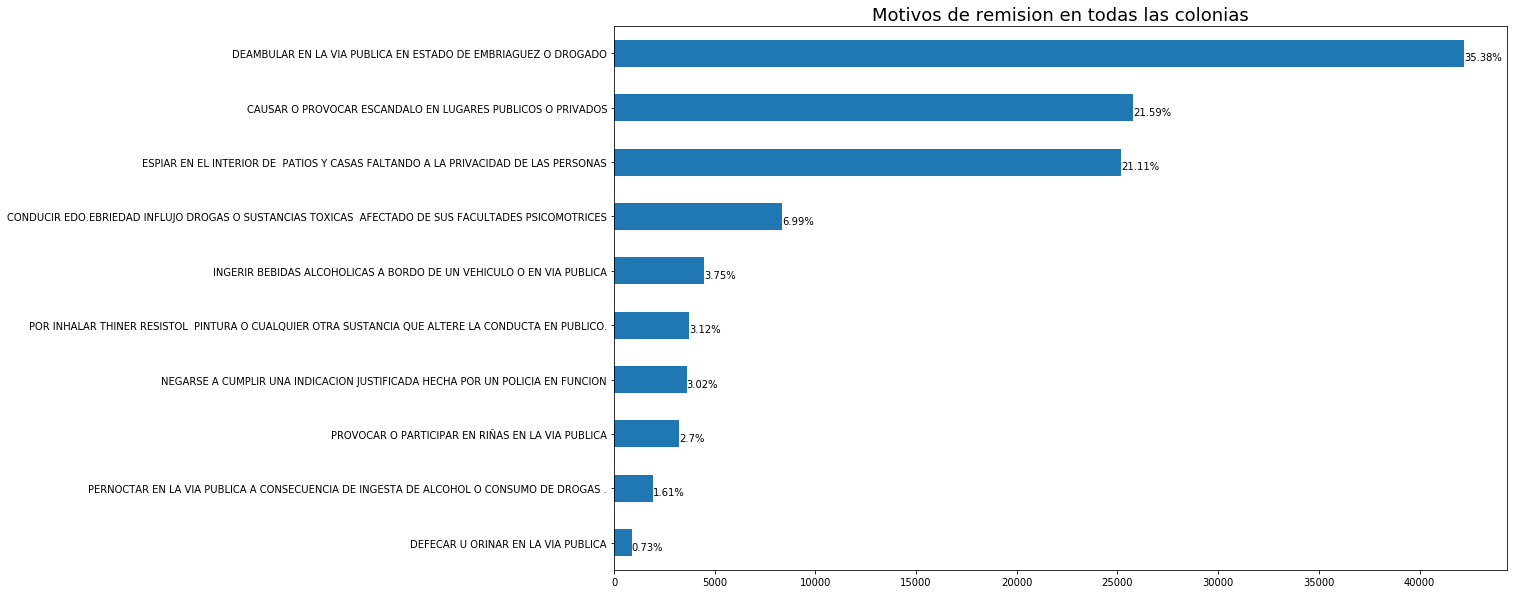

In [13]:
motivo_remision = df['motivo_remision'].value_counts()[0:10]
motivo_remision_plt = motivo_remision.plot(kind='barh',figsize = (16,10))
motivo_remision_plt.set_alpha(0.8)
motivo_remision_plt.set_title("Motivos de remision en todas las colonias", fontsize=18)


# create a list to collect the data
totals = []

# find the values and append to list
for i in motivo_remision_plt.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in motivo_remision_plt.patches:
    # get_width pulls left or right; get_y pushes up or down
    motivo_remision_plt.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='black')

#Invert the direction of the plot
motivo_remision_plt.invert_yaxis()

In [122]:
motivo_remision

DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRIAGUEZ O DROGADO                                          42224
CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICOS O PRIVADOS                                             25768
ESPIAR EN EL INTERIOR DE  PATIOS Y CASAS FALTANDO A LA PRIVACIDAD DE LAS PERSONAS                      25195
CONDUCIR EDO.EBRIEDAD INFLUJO DROGAS O SUSTANCIAS TOXICAS  AFECTADO DE SUS FACULTADES PSICOMOTRICES     8347
INGERIR BEBIDAS ALCOHOLICAS A BORDO DE UN VEHICULO O EN VIA PUBLICA                                     4480
POR INHALAR THINER RESISTOL  PINTURA O CUALQUIER OTRA SUSTANCIA QUE ALTERE LA CONDUCTA EN PUBLICO.      3724
NEGARSE A CUMPLIR UNA INDICACION JUSTIFICADA HECHA POR UN POLICIA EN FUNCION                            3601
PROVOCAR O PARTICIPAR EN RIÑAS EN LA VIA PUBLICA                                                        3217
PERNOCTAR EN LA VIA PUBLICA A CONSECUENCIA DE INGESTA DE ALCOHOL O CONSUMO DE DROGAS .                  1926
DEFECAR U ORINAR EN

# Motivos de remision en la colonia CENTRO (N)

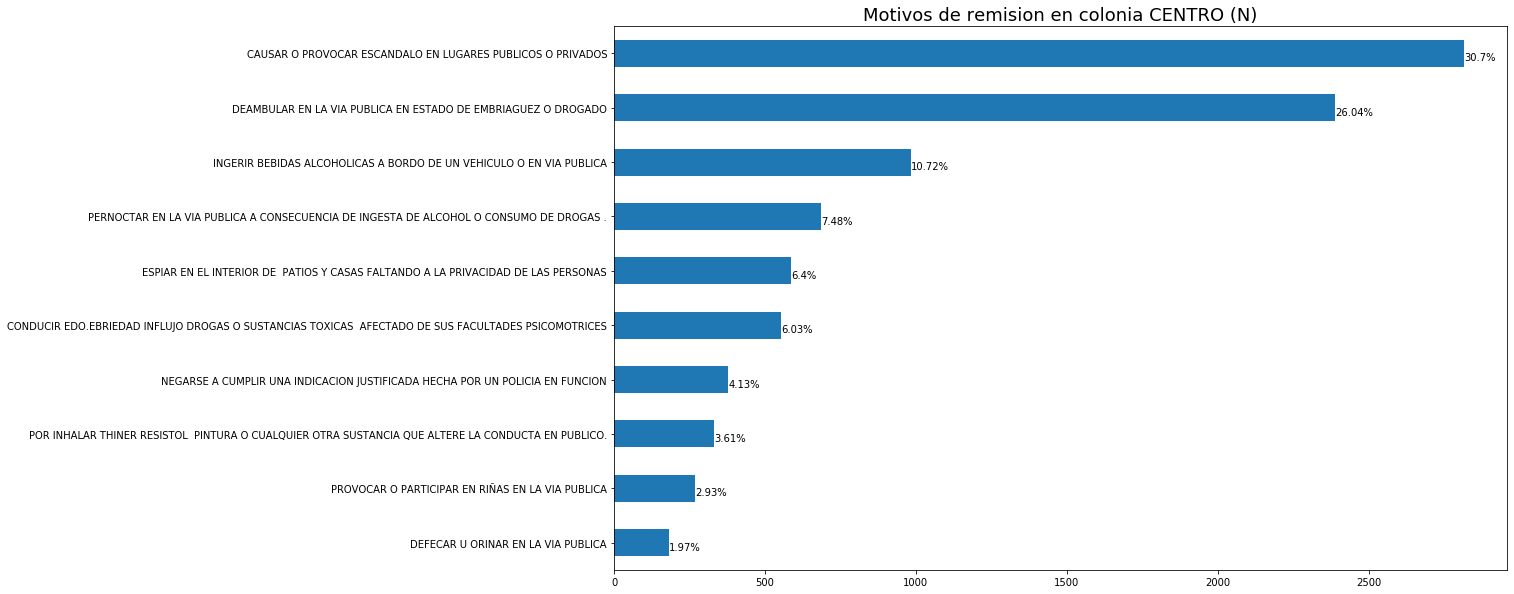

In [15]:
colonias_afectadas = df[df['colonia_delito'] == 'CENTRO (N)']
colonia_centro_motivo_remision = colonias_afectadas['motivo_remision'].value_counts()[0:10]
colonia_centro_motivo_remision_plt = colonia_centro_motivo_remision.plot(kind='barh',figsize = (16,10))
colonia_centro_motivo_remision_plt.set_alpha(0.8)
colonia_centro_motivo_remision_plt.set_title("Motivos de remision en colonia CENTRO (N)", fontsize=18)


# create a list to collect the data
totals = []

# find the values and append to list
for i in colonia_centro_motivo_remision_plt.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in colonia_centro_motivo_remision_plt.patches:
    # get_width pulls left or right; get_y pushes up or down
    colonia_centro_motivo_remision_plt.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='black')

#Invert the direction of the plot
colonia_centro_motivo_remision_plt.invert_yaxis()

In [121]:
colonia_centro_motivo_remision.head()

CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICOS O PRIVADOS                                2817
DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRIAGUEZ O DROGADO                             2390
INGERIR BEBIDAS ALCOHOLICAS A BORDO DE UN VEHICULO O EN VIA PUBLICA                        984
PERNOCTAR EN LA VIA PUBLICA A CONSECUENCIA DE INGESTA DE ALCOHOL O CONSUMO DE DROGAS .     686
ESPIAR EN EL INTERIOR DE  PATIOS Y CASAS FALTANDO A LA PRIVACIDAD DE LAS PERSONAS          587
Name: motivo_remision, dtype: int64

In [16]:
colonia_centro_motivo_remision

CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICOS O PRIVADOS                                             2817
DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRIAGUEZ O DROGADO                                          2390
INGERIR BEBIDAS ALCOHOLICAS A BORDO DE UN VEHICULO O EN VIA PUBLICA                                     984
PERNOCTAR EN LA VIA PUBLICA A CONSECUENCIA DE INGESTA DE ALCOHOL O CONSUMO DE DROGAS .                  686
ESPIAR EN EL INTERIOR DE  PATIOS Y CASAS FALTANDO A LA PRIVACIDAD DE LAS PERSONAS                       587
CONDUCIR EDO.EBRIEDAD INFLUJO DROGAS O SUSTANCIAS TOXICAS  AFECTADO DE SUS FACULTADES PSICOMOTRICES     553
NEGARSE A CUMPLIR UNA INDICACION JUSTIFICADA HECHA POR UN POLICIA EN FUNCION                            379
POR INHALAR THINER RESISTOL  PINTURA O CUALQUIER OTRA SUSTANCIA QUE ALTERE LA CONDUCTA EN PUBLICO.      331
PROVOCAR O PARTICIPAR EN RIÑAS EN LA VIA PUBLICA                                                        269
DEFECAR U ORINAR EN LA VIA P

# Espiar en el interior de patios y casas faltando la privacidad en la colonia CENTRO (N)

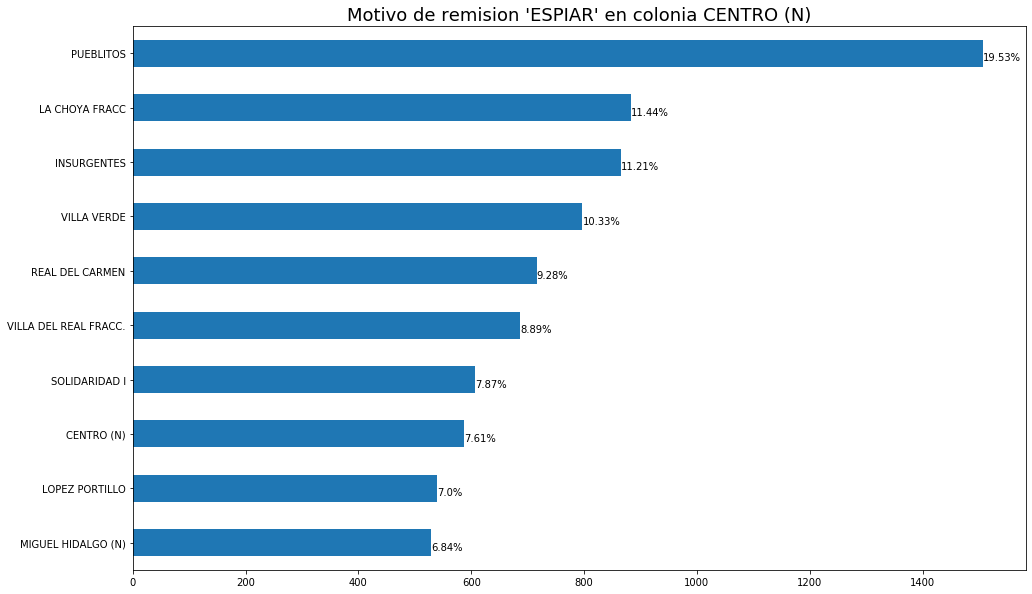

In [17]:
df_espiar = df[df['motivo_remision'] == 'ESPIAR EN EL INTERIOR DE  PATIOS Y CASAS FALTANDO A LA PRIVACIDAD DE LAS PERSONAS']
df_espiar_colonia = df_espiar['colonia_delito'].value_counts()[0:10]
df_espiar_colonia_plt = df_espiar_colonia.plot(kind='barh',figsize = (16,10))
df_espiar_colonia_plt.set_alpha(0.8)
df_espiar_colonia_plt.set_title("Motivo de remision 'ESPIAR' en colonia CENTRO (N)", fontsize=18)

# create a list to collect the data
totals = []

# find the values and append to list
for i in df_espiar_colonia_plt.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in df_espiar_colonia_plt.patches:
    # get_width pulls left or right; get_y pushes up or down
    df_espiar_colonia_plt.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='black')

#Invert the direction of the plot
df_espiar_colonia_plt.invert_yaxis()

# Cuando se dio mas el motivo de 'ESPIAR' En el año

In [52]:
#Obtenemos dia, mes y año de la columna de fecha_presentación del dataframe
df['AÑO'] = pd.DatetimeIndex(df['fecha_presentacion']).year
df['MES'] = pd.DatetimeIndex(df['fecha_presentacion']).month
df['DIA'] = pd.DatetimeIndex(df['fecha_presentacion']).day
df['HORA'] = pd.DatetimeIndex(df['fecha_presentacion']).hour
df['MINUTE'] = pd.DatetimeIndex(df['fecha_presentacion']).minute
df.drop('fecha_presentacion', axis= 1, inplace = True)
df.head()

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,colonia_detenido,AÑO,MES,DIA,HORA,MINUTE
0,Comandancia Norte,ALVARO OBREGON (N),CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1990,1.75,60.0,M,SAHUARO AMPLIACION,2015,1,1,0,39
1,Comandancia Sur,PALO VERDE INDEUR,CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1984,1.72,85.0,M,PALO VERDE INDEUR,2015,1,1,0,39
2,Comandancia Norte,CARMEN SERDAN (N),DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRI...,1980,1.65,65.0,M,FLOTANTE,2015,1,1,1,43
3,Comandancia Sur,REAL DEL CARMEN,CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1979,1.69,68.0,M,REAL DEL CARMEN,2015,1,1,1,59
4,Comandancia Centro,FUERA DEL MUNICIPIO,INGERIR BEBIDAS ALCOHOLICAS A BORDO DE UN VEHI...,1987,1.74,70.0,M,FUERA DEL MUNICIPIO,2015,1,1,2,0


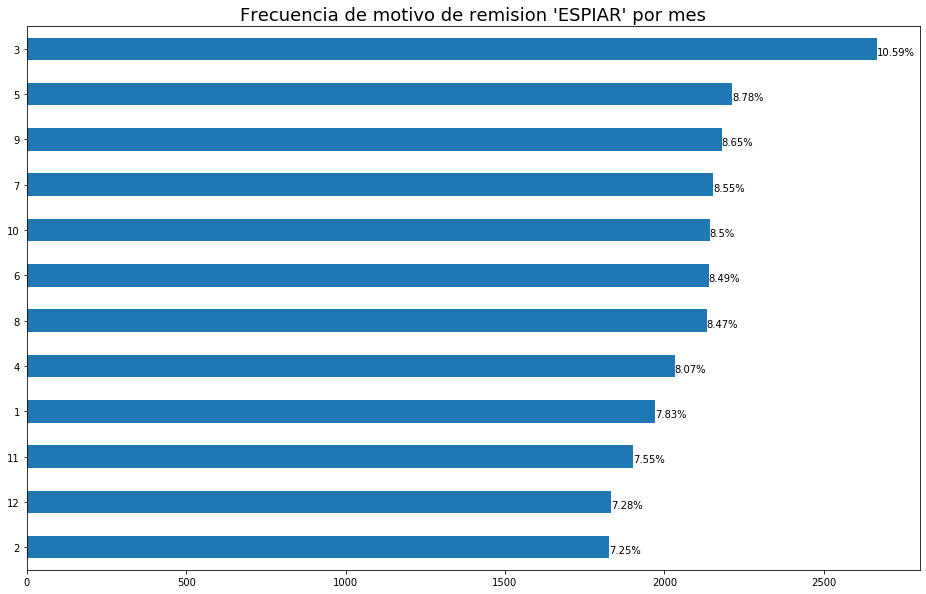

In [54]:
df1 = df.copy()
df_espiar = df1[df1['motivo_remision'] == 'ESPIAR EN EL INTERIOR DE  PATIOS Y CASAS FALTANDO A LA PRIVACIDAD DE LAS PERSONAS']
df_espiar_mes = df_espiar['MES'].value_counts()
df_espiar_mes_plt = df_espiar_mes.plot(kind='barh',figsize = (16,10))
df_espiar_mes_plt.set_alpha(0.8)
df_espiar_mes_plt.set_title("Frecuencia de motivo de remision 'ESPIAR' por mes", fontsize=18)


# create a list to collect the data
totals = []

# find the values and append to list
for i in df_espiar_mes_plt.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in df_espiar_mes_plt.patches:
    # get_width pulls left or right; get_y pushes up or down
    df_espiar_mes_plt.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='black')


#Invert the direction of the plot
df_espiar_mes_plt.invert_yaxis()

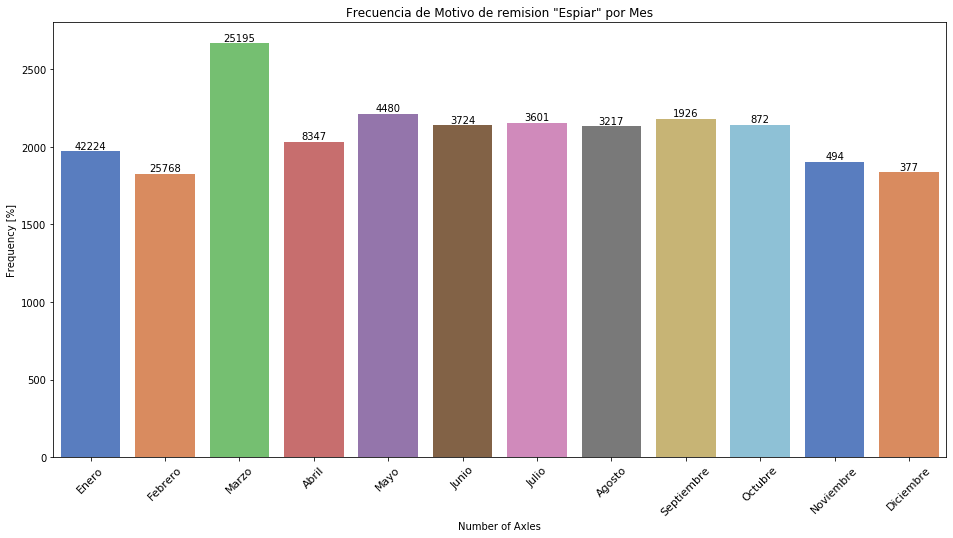

In [55]:
plt.figure(figsize=(16,8))
motivo_remision_mes_plt = sns.countplot(x='MES',data=df_espiar, palette="muted")
plt.title('Frecuencia de Motivo de remision "Espiar" por Mes' )
plt.xlabel('Number of Axles')
plt.ylabel('Frequency [%]')

labels = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", 'Junio', 'Julio', 'Agosto', 'Septiembre',
          "Octubre", 'Noviembre', 'Diciembre']
motivo_remision_mes_plt.set_xticklabels(labels, rotation = 45 , fontsize=11)

i=0
for p in motivo_remision_mes_plt.patches:
    height = p.get_height() + 15
    motivo_remision_mes_plt.text(p.get_x()+p.get_width()/2., height,
    df1['motivo_remision'].value_counts()[i], ha="center")
    i += 1

In [168]:
dfcentro.head()
dfcentro_año = dfcentro[dfcentro['nacimiento'] > 1970 ] #& dfcentro['nacimieto']<2000
dfcentro_año.describe()

,nacimiento,estatura,peso
count,8033.000000,8023.000000,8023.000000
mean,1984.393502,1.691868,71.063567
std,7.686761,0.097481,11.939302
min,1971.000000,0.600000,30.000000
25%,1978.000000,1.650000,64.000000
50%,1984.000000,1.700000,70.000000
75%,1991.000000,1.750000,78.000000
max,2003.000000,1.990000,165.000000


Text(0, 0.5, 'Frequency')

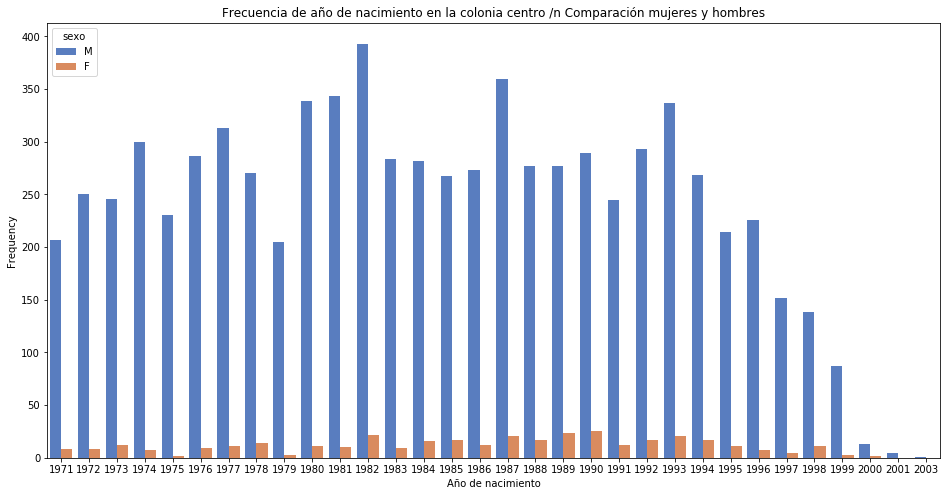

In [173]:
plt.figure(figsize=(16,8))
dfcentro_nacimiento_plt = sns.countplot(x='nacimiento',data=dfcentro_año, palette="muted", hue='sexo')
plt.title('Frecuencia de año de nacimiento en la colonia centro /n Comparación mujeres y hombres')
plt.xlabel('Año de nacimiento')
plt.ylabel('Frequency')


In [174]:
df.head()
#dfcentro_año = dfcentro[dfcentro['nacimiento'] > 1970 ] #& dfcentro['nacimieto']<2000
#dfcentro_año.describe()

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,colonia_detenido,AÑO,MES,DIA,HORA,MINUTE
0,Comandancia Norte,ALVARO OBREGON (N),CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1990,1.75,60.0,M,SAHUARO AMPLIACION,2015,1,1,0,39
1,Comandancia Sur,PALO VERDE INDEUR,CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1984,1.72,85.0,M,PALO VERDE INDEUR,2015,1,1,0,39
2,Comandancia Norte,CARMEN SERDAN (N),DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRI...,1980,1.65,65.0,M,FLOTANTE,2015,1,1,1,43
3,Comandancia Sur,REAL DEL CARMEN,CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1979,1.69,68.0,M,REAL DEL CARMEN,2015,1,1,1,59
4,Comandancia Centro,FUERA DEL MUNICIPIO,INGERIR BEBIDAS ALCOHOLICAS A BORDO DE UN VEHI...,1987,1.74,70.0,M,FUERA DEL MUNICIPIO,2015,1,1,2,0


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122192 entries, 0 to 122191
Data columns (total 13 columns):
zona                122192 non-null object
colonia_delito      122192 non-null object
motivo_remision     122192 non-null object
nacimiento          122192 non-null int64
estatura            122156 non-null float64
peso                122155 non-null float64
sexo                122192 non-null object
colonia_detenido    122192 non-null object
AÑO                 122192 non-null int64
MES                 122192 non-null int64
DIA                 122192 non-null int64
HORA                122192 non-null int64
MINUTE              122192 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 12.1+ MB


In [61]:
df1.isna().sum()

zona                 0
colonia_delito       0
motivo_remision      0
nacimiento           0
estatura             0
peso                37
sexo                 0
colonia_detenido     0
AÑO                  0
MES                  0
DIA                  0
HORA                 0
MINUTE               0
dtype: int64

In [62]:
df1.estatura = df1.estatura.fillna(df1.estatura.mean())
df1.peso = df1.peso.fillna(df1.peso.mean())
df1.isna().sum()

zona                0
colonia_delito      0
motivo_remision     0
nacimiento          0
estatura            0
peso                0
sexo                0
colonia_detenido    0
AÑO                 0
MES                 0
DIA                 0
HORA                0
MINUTE              0
dtype: int64

# hacer dummies motivo de remision y colonia del retenido

In [176]:
new_df = df1.copy()
#new_df['motivo_remision'] = pd.factorize(new_df['motivo_remision'], sort=True)[0] + 1
new_df['colonia_delito'] = pd.factorize(new_df['colonia_delito'], sort=True)[0] + 1
new_df['sexo'] = pd.factorize(new_df['sexo'], sort=True)[0] + 1
new_df['zona'] = pd.factorize(new_df['zona'], sort=True)[0] + 1
new_df['motivo_remision'] = pd.factorize(new_df['motivo_remision'], sort=True)[0] + 1
new_df.drop('colonia_detenido', axis = 1, inplace=True)

new_df.head()

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,AÑO,MES,DIA,HORA,MINUTE
0,5,18,9,1990,1.75,60.0,2,2015,1,1,0,39
1,6,223,9,1984,1.72,85.0,2,2015,1,1,0,39
2,5,50,18,1980,1.65,65.0,2,2015,1,1,1,43
3,6,284,9,1979,1.69,68.0,2,2015,1,1,1,59
4,4,114,33,1987,1.74,70.0,2,2015,1,1,2,0


In [64]:
new_df_dummies = pd.get_dummies(new_df['motivo_remision'])
#new_df['motivo_remision'].get_dummies()
new_df2 = pd.concat([new_df, new_df_dummies], axis = 1)
new_df2.drop('motivo_remision', axis = 1, inplace= True)
new_df2.head()

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,AÑO,MES,DIA,...,PROFERIR PALABRAS OBSCENAS O HACER ALGO QUE FALTE AL RESPETO EN ACTOS CIVICOS,PROVOCAR O PARTICIPAR EN RIÑAS EN LA VIA PUBLICA,RAYAR PINTAR RASPAR O MALTRATAR UN BIEN MUEBLE O INMUEBLE AJENO.,REALIZAR MARCHAS EN VIA PUBLICA SIN AUTORIZACION SI INTERFIEREN CON EL TRANSITO,REGISTRO O PADRON SANITARIO DE PERSONAS DEDICADAS AL SEXO SERVICIO,SANCION DE FALTA CON REFERENCIA EN EL ART. 21 DE LA CONSTITUCION,SANCIONES POR FALTAS AL BUEN GOBIERNO DISPOSICIONES GENERALES,SE REQUIERE AUTORIZACION LICENCIA O PERMISO PARA CELEBRACION DE BAILES O FESTIVIDADES,UTILIZAR RADIO LUCES CLAVES SIRENAS UNIFORMES ETC EXCLUSIVO PARA CORPORACIONES MUNICIPALES,VENDER BEBIDAS ALCOHOLICAS SIN LA ANUENCIA MUNICIPAL
0,5,18,CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1990,1.75,60.0,2,2015,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6,223,CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1984,1.72,85.0,2,2015,1,1,...,0,0,0,0,0,0,0,0,0,0
2,5,50,DEAMBULAR EN LA VIA PUBLICA EN ESTADO DE EMBRI...,1980,1.65,65.0,2,2015,1,1,...,0,0,0,0,0,0,0,0,0,0
3,6,284,CAUSAR O PROVOCAR ESCANDALO EN LUGARES PUBLICO...,1979,1.69,68.0,2,2015,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,114,INGERIR BEBIDAS ALCOHOLICAS A BORDO DE UN VEHI...,1987,1.74,70.0,2,2015,1,1,...,0,0,0,0,0,0,0,0,0,0


In [97]:
new_df2['DEFECAR U ORINAR EN LA VIA PUBLICA'].sum()

872

In [175]:
new_df.head()

,zona,colonia_delito,motivo_remision,nacimiento,estatura,peso,sexo,AÑO,MES,DIA,HORA,MINUTE
0,5,18,9,1990,1.75,60.0,2,2015,1,1,0,39
1,6,223,9,1984,1.72,85.0,2,2015,1,1,0,39
2,5,50,18,1980,1.65,65.0,2,2015,1,1,1,43
3,6,284,9,1979,1.69,68.0,2,2015,1,1,1,59
4,4,114,33,1987,1.74,70.0,2,2015,1,1,2,0


In [67]:
#This is for splitting the train data vs the test data
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

# This is for Logistic Regression
from sklearn.linear_model import LogisticRegression

#This is for Linear Regression

from sklearn.linear_model import LinearRegression

#This is a import for classification_report, it will show the accuracy of the training model

from sklearn.metrics import classification_report, confusion_matrix

#This is a import for Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Steps to predict 
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

In [109]:
X = new_df.drop('motivo_remision', 
                 axis = 1)
y = new_df['motivo_remision']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

In [110]:
# Escalar los datos
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

# Random Forest

In [111]:
rfc = RandomForestClassifier(n_estimators = 10,criterion = 'gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
prediction = rfc.predict(X_test)

In [113]:
#prediction = rfc.predict(X_test)
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


              precision    recall  f1-score   support

           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1
           5       0.37      0.08      0.14       156
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.28      0.35      0.31      7574
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00        12
          14       0.38      0.33      0.35      2489
          15       0.00      0.00      0.00         0
          18       0.43      0.53      0.47     12745
          19       0.05      0.01      0.01       245
          20 

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [114]:
# Create the parameter grid to optimize
param_frst = [
    {
        'criterion': ['gini', 'entropy'],
        'bootstrap': [True, False],
        'n_estimators': [50, 100], 
        'max_depth': [2, 5],
        'max_leaf_nodes': [10, 20]
    }
  ]

In [115]:
# Escoger hiperparametros para modelo Random Forest
from sklearn.model_selection import GridSearchCV
#param_frst = [{"n_estimators": [100,500,750,1000], "criterion": ["gini", "entropy"]}]
grid_search_frst = GridSearchCV(estimator=rfc,
                          param_grid=param_frst,
                          scoring = 'accuracy',
                          cv=3,
                          n_jobs=-1)
grid_search_frst = grid_search_frst.fit(X_train, y_train)

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [116]:
# Calcular accuracy para Random Forest 
best_acc_frst = grid_search_frst.best_score_
best_acc_frst

0.3753828886758482

In [117]:
# Calcular los mejores parametros para el modelo Random Forest
best_params_frst = grid_search_frst.best_params_
best_params_frst

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 20,
 'n_estimators': 100}

In [118]:
rfc = RandomForestClassifier(bootstrap= True,
 criterion= 'gini',
 max_depth= 5,
 max_leaf_nodes = 20,
 n_estimators= 100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
prediction = rfc.predict(X_test)

In [120]:
#prediction = rfc.predict(X_test)
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


              precision    recall  f1-score   support

           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00       156
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.35      0.08      0.14      7574
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        12
          14       0.41      0.19      0.26      2489
          18       0.37      0.91      0.53     12745
          19       0.00      0.00      0.00       245
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22 

C:\Users\Daniel Ramirez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes

In [91]:
# Iniciar y ajustar el modelo de Naive Bayes al dataset de entrenamiento.
from sklearn.naive_bayes import GaussianNB
naive_b = GaussianNB()
naive_b.fit(X_train, y_train)

#Predicción
y_naive = naive_b.predict(X_test)

Text(0.5, 1.05, 'Confusion matrix para Naive Bayes')

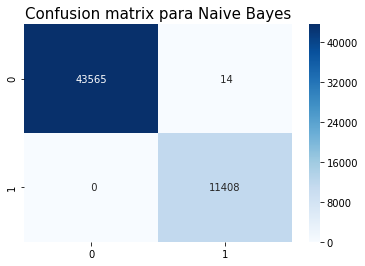

In [92]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
naive_cm = confusion_matrix(y_test, y_naive)
sns.heatmap(naive_cm,annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion matrix para Naive Bayes', y=1.05, size=15)

In [93]:
# Reporte de Clasificación
from sklearn.metrics import classification_report
naive_cr = classification_report(y_test, y_naive)
print(naive_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43579
           1       1.00      1.00      1.00     11408

    accuracy                           1.00     54987
   macro avg       1.00      1.00      1.00     54987
weighted avg       1.00      1.00      1.00     54987



Regresion logistica

In [ ]:
# iniciar y ajustar el modelo de regresión logistica en el dataset de entrenamiento.

# primero importamos la libreria de Regresion Logistica de SkLearn
from sklearn.linear_model import LogisticRegression
log_rg = LogisticRegression()
log_rg.fit(X_train, y_train)

# Predicción
y_log_rg = log_rg.predict(X_test)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_log_rg)
sns.heatmap(cm,annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion matrix para Regresión Logistica', y=1.05, size=15)

In [ ]:
# Reporte de Clasificación
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_log_rg)
print(cr)

In [ ]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)